In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [ ]:
m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_mod.npy')

In [2]:
m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m4 = np.load('../../params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [3]:
t = np.linspace(0,1800,500)
m = model.components
print(list(model.initial_conditions))

[(A20(brip=None), Parameter('A20_0', 9075.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0)), (cIAP(btraf=None), Parameter('cIAP_0', 8986.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9075.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (FLIP(bDED=None, state='A'), Parameter('FLIP_0', 3910.0)), (LUBAC(brip=None), Parameter('LUBAC_0', 7226.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 22044.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4809.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0))]


In [4]:
solverwtm2 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm2  = solverwtm2.run(param_values=m2, num_processors = 20)
mode1df_wtm2 = mode1wtm2.dataframe

2022-01-15 10:35:37.138 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 10:35:37.975 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 10:35:38.097 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 10:35:38.314 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 10:39:46.902 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 10:39:46.905 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 10:39:49.752 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


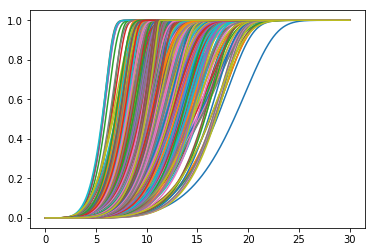

In [6]:
plt.figure()
for n in range(len(m2)):
    plt.plot(t/60, mode1df_wtm2.loc[n]['MLKLa_obs'].iloc[:]/5544)
plt.show()

In [7]:
thresh = 2772
ttdm2wt = []
for j in range(len(m2)):
    i_range = range(len(mode1df_wtm2.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_wtm2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2wt.append(mode1df_wtm2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2wt.append(np.inf)
for i in range(len(ttdm2wt)):
    if ttdm2wt[i] == np.inf:
        ttdm2wt[i] = 2100               

In [8]:
solverkdm2lubac = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2lubac   = solverkdm2lubac.run(initials = {m.LUBAC(brip=None):1445},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2lubac  = mode1kdm2lubac.dataframe

2022-01-15 10:44:55.753 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 10:44:55.767 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 10:44:55.839 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 10:44:56.053 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 10:48:43.140 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 10:48:43.142 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 10:48:45.578 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [10]:
thresh = 2772
ttdm2lubkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2lubac.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2lubac.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2lubkd.append(mode1df_kdm2lubac.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2lubkd.append(np.inf)
for i in range(len(ttdm2lubkd)):
    if ttdm2lubkd[i] == np.inf:
        ttdm2lubkd[i] = 2100              

In [11]:
solveroem2lubac = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2lubac  = solveroem2lubac.run(initials = {m.LUBAC(brip=None):72260},
                                        param_values=m2, num_processors = 20)
mode1df_oem2lubac = mode1oem2lubac.dataframe

2022-01-15 10:53:26.373 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 10:53:26.385 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 10:53:26.459 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 10:53:26.985 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 10:57:15.032 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 10:57:15.034 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 10:57:17.474 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [13]:
thresh = 2772
ttdm2luboe2 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2lubac.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2lubac.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2luboe2.append(mode1df_oem2lubac.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2luboe2.append(np.inf)
for i in range(len(ttdm2luboe2)):
    if ttdm2luboe2[i] == np.inf:
        ttdm2luboe2[i] = 2100               

In [14]:
solverkdm2a20 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2a20   = solverkdm2a20.run(initials = {m.A20(brip=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2a20  = mode1kdm2a20.dataframe

2022-01-15 11:11:04.188 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 11:11:04.195 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 11:11:04.230 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 11:11:04.423 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 11:15:00.387 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 11:15:00.389 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 11:15:02.814 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [15]:
thresh = 2772
ttdm2a20kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2a20.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2a20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2a20kd.append(mode1df_kdm2a20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2a20kd.append(np.inf)
for i in range(len(ttdm2a20kd)):
    if ttdm2a20kd[i] == np.inf:
        ttdm2a20kd[i] = 2100               

In [16]:
solveroem2a20 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2a20  = solveroem2a20.run(initials = {m.A20(brip=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2a20 = mode1oem2a20.dataframe

2022-01-15 11:19:02.153 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 11:19:02.158 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 11:19:02.192 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 11:19:02.377 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 11:22:59.150 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 11:22:59.152 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 11:23:01.609 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [17]:
thresh = 2772
ttdm2a20oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2a20.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2a20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2a20oe.append(mode1df_oem2a20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2a20oe.append(np.inf)
for i in range(len(ttdm2a20oe)):
    if ttdm2a20oe[i] == np.inf:
        ttdm2a20oe[i] = 2100               

In [18]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

2022-01-15 11:27:37.510 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 11:27:37.515 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 11:27:37.549 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 11:27:37.742 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 11:31:39.668 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 11:31:39.669 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 11:31:42.084 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [19]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [20]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

2022-01-15 11:36:03.027 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 11:36:03.032 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 11:36:03.067 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 11:36:03.256 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 11:39:55.716 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 11:39:55.717 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 11:39:58.149 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [21]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(c2)):
    plt.plot(tspan, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue', alpha= 0.4)
#     plt.plot(tspan, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'orange', alpha = 0.25)
#     plt.plot(tspan, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.25)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (m)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 1800)
plt.ylim(ymin = 0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
               Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['WT', 'LUBACKD', 'LUBACOE'], prop={'size': 10}, loc = 'best')
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_linesmin.pdf')
plt.show() 

In [ ]:
ttdm2a20kd

In [ ]:
print(len(ttdm2wt))
print(len(ttdm2lubkd))
print(len(ttdm2luboe2))
print(len(ttdm2a20kd))
print(len(ttdm2a20oe))
print(len(ttdm2cyldoe))
print(len(ttdm2cyldkd))

In [27]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2lub = pd.DataFrame({'KD': ttdm2lubkd,
                         'OE': ttdm2luboe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
framesm2 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','WT','KD','OE'])
dfm2 = pd.melt(dfmode2, id_vars=["species"])
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

No handles with labels found to put in legend.


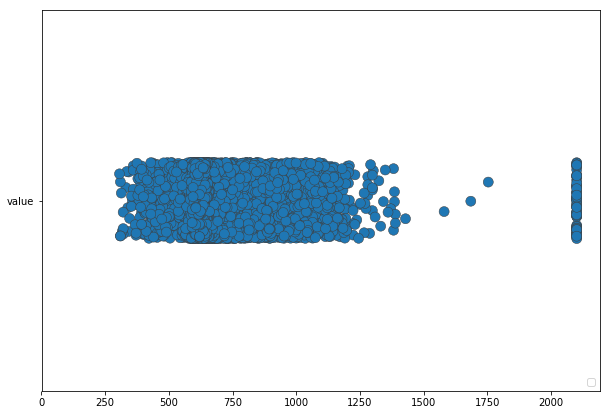

In [24]:
import seaborn as sns
plt.figure(figsize = (10,7))
# sns.stripplot(data=mode2wt, orient = 'h',linewidth=0.5,size=10)
sns.stripplot(data=dfm2, orient = 'h',linewidth=0.5,size=10)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

No handles with labels found to put in legend.


(0, 2150)

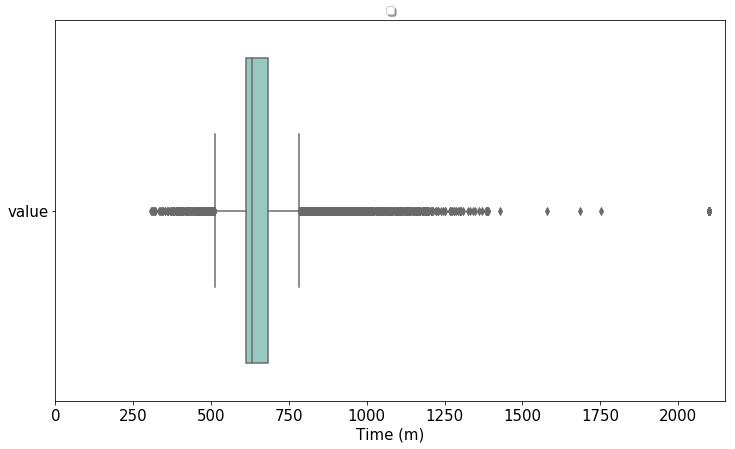

In [25]:
plt.figure(figsize = (12,7))
b = sns.boxplot(data=dfm2, palette="Set3", orient = 'h') #,showfliers = False, whis = 0)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

(0, 2150)

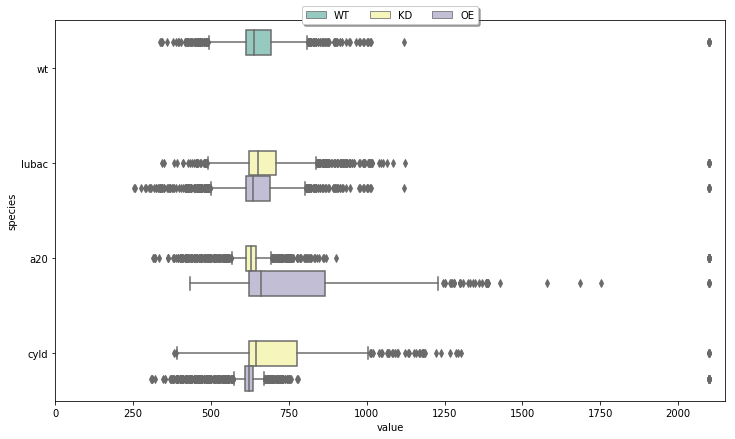

In [28]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm2, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm2, y="species", x="value", hue="variable", palette = "Blues")

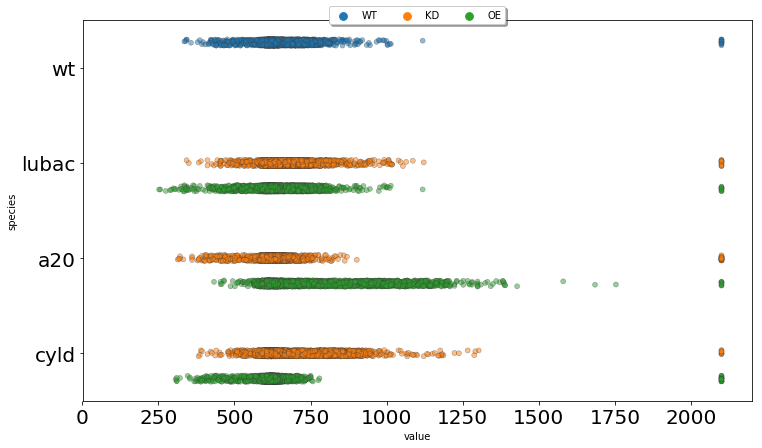

In [29]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm2, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt2 = pd.DataFrame({'WT': ttdm2wt,
                        'LUBAC KD': ttdm2lubkd,
                         'LUBAC OE': ttdm2luboe,
                        'A20 KD': ttdm2a20kd,
                          'A20 OE': ttdm2a20oe,
                        'CYLD KD': ttdm2cyldkd,
                          'CYLD OE': ttdm2cyldoe})
# framesm2 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode22 = pd.DataFrame(data = mode2wt2,
                       columns = ['WT','LUBAC KD','LUBAC OE','A20 KD','A20 OE','CYLD KD','CYLD OE'])
dfm22 = pd.melt(dfmode22)
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "indianred", "LUBAC KD": "lightsalmon", "LUBAC OE": "mediumseagreen", 
          "A20 KD": "lightsalmon", "A20 OE": "mediumseagreen", 
          "CYLD KD": "lightsalmon", "CYLD OE": "mediumseagreen"}
# my_pal1 = {"wt0": "red", "a200":"blue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfm22, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal1)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.5})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
# sns.boxplot(x = 'variable', y = 'value', label ='WT',color=["red",'green'], bins=10, **kwargs, kde = True)
# g = sns.boxplot(y='variable',x='value',data=dfclus2n, showfliers=True, boxprops=dict(alpha=1))
g = sns.stripplot(y='variable',x='value',data=dfm22, 
                        marker="o", alpha=0.3, order=['WT', 'LUBACKD','LUBACOE','A20KD', 'A20OE','CYLDKD', 'CYLDOE'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# sns.distplot(mode2_lubacoe, label = 'LUBAC KD',color="blue", bins=10, **kwargs, kde = True)
# sns.distplot(mode2_lubackd, label = 'LUBAC OE',color="green", bins=10, **kwargs, kde = True)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (m)')
plt.ylabel('Species')
plt.legend(loc = 'best')
# plt.xlim(xmin = 1, xmax = 1000)
# ax.set_yticks([1, 1.5, 2])
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_strip.pdf')
plt.show()

In [ ]:
list(model.initial_conditions)

In [30]:
solverkdm2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2fadd   = solverkdm2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):2695},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2fadd  = mode1kdm2fadd.dataframe

2022-01-15 11:51:52.240 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 11:51:52.252 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 11:51:52.324 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 11:51:52.756 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 11:55:49.092 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 11:55:49.095 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 11:55:51.534 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [31]:
thresh = 2772
ttdm2kdfadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdfadd.append(mode1df_kdm2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdfadd.append(np.inf)
for i in range(len(ttdm2kdfadd)):
    if ttdm2kdfadd[i] == np.inf:
        ttdm2kdfadd[i] = 2100               

In [32]:
solveroem2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2fadd  = solveroem2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):89860},
                                        param_values=m2, num_processors = 20)
mode1df_oem2fadd = mode1oem2fadd.dataframe

2022-01-15 11:59:55.678 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 11:59:55.684 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 11:59:55.719 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 11:59:55.905 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 12:03:48.244 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 12:03:48.247 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 12:03:50.665 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [33]:
thresh = 2772
ttdm2oefadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oefadd.append(mode1df_oem2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oefadd.append(np.inf)
for i in range(len(ttdm2oefadd)):
    if ttdm2oefadd[i] == np.inf:
        ttdm2oefadd[i] = 2100               

In [34]:
solverkdm2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2r3   = solverkdm2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):3196},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2r3  = mode1kdm2r3.dataframe

2022-01-15 12:07:54.224 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 12:07:54.229 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 12:07:54.265 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 12:07:54.457 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 12:11:46.963 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 12:11:46.966 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 12:11:49.416 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [35]:
thresh = 2772
ttdm2kdr3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdr3.append(mode1df_kdm2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdr3.append(np.inf)
for i in range(len(ttdm2kdr3)):
    if ttdm2kdr3[i] == np.inf:
        ttdm2kdr3[i] = 2100               

In [36]:
solveroem2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2r3  = solveroem2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):106540},
                                        param_values=m2, num_processors = 20)
mode1df_oem2r3 = mode1oem2r3.dataframe

2022-01-15 12:16:00.465 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-15 12:16:00.471 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-15 12:16:00.546 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-15 12:16:00.772 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-15 12:20:02.189 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-15 12:20:02.191 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-15 12:20:05.212 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [37]:
thresh = 2772
ttdm2oer3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oer3.append(mode1df_oem2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oer3.append(np.inf)
for i in range(len(ttdm2oer3)):
    if ttdm2oer3[i] == np.inf:
        ttdm2oer3[i] = 2100               

In [50]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2lub = pd.DataFrame({'KD': ttdm2lubkd,
                         'OE': ttdm2luboe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
mode2fadd = pd.DataFrame({'KD': ttdm2kdfadd,
                          'OE': ttdm2oefadd,
                        'species': 'fadd'})
mode2r3 = pd.DataFrame({'KD': ttdm2kdr3,
                          'OE': ttdm2oer3,
                        'species': 'rip3'})
framesm3 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','WT','KD','OE'])
dfm23 = pd.melt(dfmode3, id_vars=["species"])
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

In [48]:
print(len(ttdm2wt))

3489


In [47]:
m4occurrenceswt = ttdm2wt.count(2100)
m4occurrenceslub = ttdm2lubkd.count(2100)
m4occurrencesfadd = ttdm2kdfadd.count(2100)
m4occurrencesr3 = ttdm2kdr3.count(2100)
print(m4occurrenceswt)
print(m4occurrenceslub)
print(m4occurrencesfadd)
print(m4occurrencesr3)

12
12
8
10


(0, 2150)

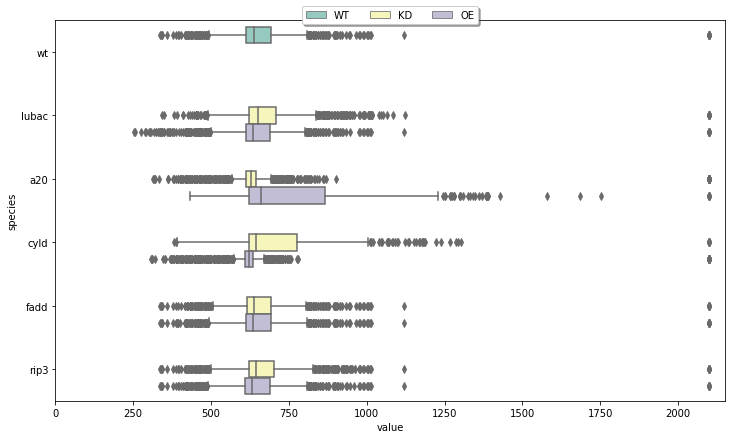

In [43]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm23, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

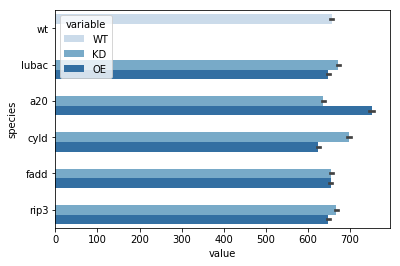

In [44]:
sns.barplot(data=dfm23, y="species", x="value", hue="variable", palette = "Blues")

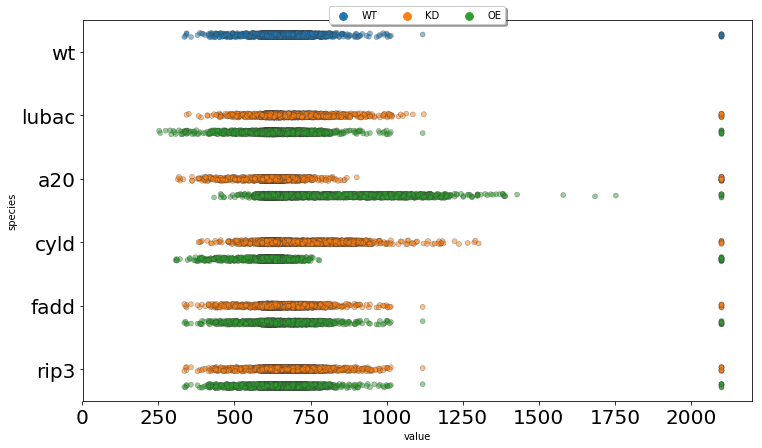

In [45]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [65]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttdm2wt, 
                        'LUBAC KD': ttdm2lubkd,
                         'LUBAC OE': ttdm2luboe2,
                        'A20 KD': ttdm2a20kd,
                          'A20 OE': ttdm2a20oe,
                        'CYLD KD': ttdm2cyldkd,
                          'CYLD OE': ttdm2cyldoe})
dfclus0n = pd.DataFrame(data = mode1df,
                        columns = ['WT', 'LUBAC KD', 'LUBAC OE','A20 KD', 'A20 OE','CYLD KD', 'CYLD OE'])
dfclus1n = pd.melt(dfclus0n)

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (12,10))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfclus0n), zorder=2, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.xlim(xmin = 250, xmax = 1000)

ValueError: operands could not be broadcast together with shapes (500,) (3489,) 

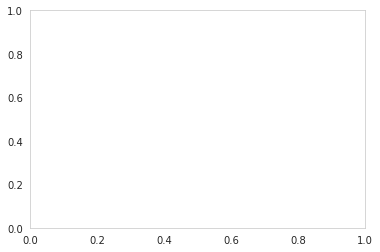

In [57]:
# Data
# years_of_experience = t
salary=[ ttdm2wt, ttdm2a20kd, ttdm2a20oe]
# Plot
plt.stackplot(t,salary, labels=['WT','KD','OE'])
plt.legend(loc='upper left')
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

In [ ]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [ ]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               